In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_501_1000_100_new2threshold_fixedhurst.pkl', 'rb') as f:
    traderIDsNoPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_501_1000_100_new2threshold_fixedhurst.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_501_1000_100_new2threshold_fixedhurst.npy")
TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_501_1000_100_new2threshold_fixedhurst.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_501_1000_100_new2threshold_fixedhurst.csv")

In [4]:
cascades_minsep2 = {}

for stock in range(len(stockPoolNPC)):
#     print(stock)
    cascades_minsep2 = utils.findStockOrderCascades(TtotalOrdersNPC[TtotalOrdersNPC['stock']==stock], 
                                                    cascades = cascades_minsep2, minSep = 2)

In [6]:
sizes, nrows, duration = utils.cascadeAnalyzer(cascades_minsep2, stockPoolNPC)

passed cascade 1 of size 2428
passed cascade 3 of size 2921
passed cascade 7 of size 816
passed cascade 8 of size 6783
passed cascade 37 of size 2848
passed cascade 43 of size 2248
passed cascade 44 of size 2048
passed cascade 58 of size 26
passed cascade 68 of size 11431
passed cascade 73 of size 1863
passed cascade 75 of size 7915
passed cascade 79 of size 12345
passed cascade 80 of size 7193
passed cascade 81 of size 5976
passed cascade 82 of size 11360
passed cascade 85 of size 2487
passed cascade 95 of size 11575
passed cascade 110 of size 6739
passed cascade 111 of size 986
passed cascade 116 of size 9008
passed cascade 131 of size 16751
passed cascade 135 of size 16718
passed cascade 137 of size 12467
passed cascade 153 of size 4597
passed cascade 157 of size 1397
passed cascade 161 of size 4404
passed cascade 168 of size 3062
passed cascade 175 of size 4233
passed cascade 177 of size 5555
passed cascade 178 of size 3344
passed cascade 184 of size 12349
passed cascade 187 of siz

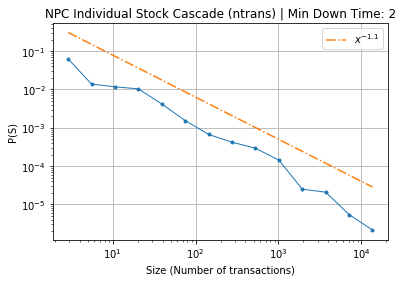

In [10]:
hist, bins = np.histogram(nrows, bins=np.logspace(np.log10(min(nrows)),np.log10(max(nrows)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.1), '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/norpicechange/7-9/stockcascadesize_ntrans_79o501p1000s100t_minSep2_.png", dpi=250)
plt.show()
plt.close()

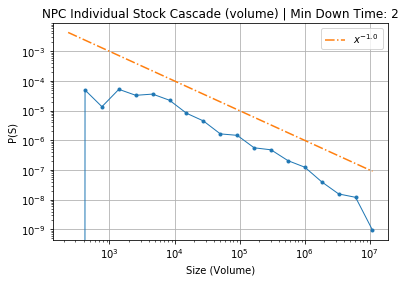

In [8]:
hist, bins = np.histogram(sizes, bins=np.logspace(np.log10(min(sizes)),np.log10(max(sizes)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/stockcascadesize_ntrans_79o501p1000s100t_minSep2_.png", dpi=250)
plt.show()
plt.close()

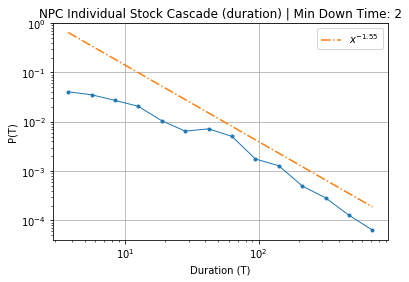

In [9]:
hist, bins = np.histogram(duration, bins=np.logspace(np.log10(min(duration)),np.log10(max(duration)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*5, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/7-9/stockcascadesize_ntrans_79o501p1000s100t_minSep2_.png", dpi=250)
plt.show()
plt.close()